In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

### Data import

In [2]:
result=pd.read_csv("new_final.csv")

In [32]:
result.head()  # sample data

,payFrequency,apr,originated,nPaidOff,approved,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,Application_Year,Application_Month,installmentIndex,isCollection,principal,fees,paymentAmount,paymentStatus,isFunded
0,0,199.0,1,0.0,1,1,3000.0,6395.19,4,3,0.0,2016,1,1.0,0,151.98,114.49,266.47,1,1.0
1,0,199.0,1,0.0,1,1,3000.0,6395.19,4,3,0.0,2016,1,2.0,0,49.08,217.39,266.47,1,1.0
2,0,199.0,1,0.0,1,1,3000.0,6395.19,4,3,0.0,2016,1,3.0,0,52.83,213.64,266.47,1,1.0
3,0,199.0,1,0.0,1,1,3000.0,6395.19,4,3,0.0,2016,1,4.0,0,56.86,209.61,266.47,1,1.0
4,0,199.0,1,0.0,1,1,3000.0,6395.19,4,3,0.0,2016,1,5.0,0,61.20,205.27,266.47,1,1.0


In [6]:
X = result.drop('isFunded',axis=1)   # spliting data x and y
y = result[['isFunded']]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)   # using train_test_split to split data 80 percent 20 percent

In [8]:
X_train  # split x train data

,payFrequency,apr,originated,nPaidOff,approved,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,Application_Year,Application_Month,installmentIndex,isCollection,principal,fees,paymentAmount,paymentStatus
126910,1,490.00,1,0.0,1,3,500.0,1367.55,7,0,3.0,2016,12,10.0,0,11.41,41.14,52.55,1
383397,0,570.32,1,1.0,1,1,400.0,1087.90,0,1,6.0,2014,12,6.0,0,20.23,78.67,98.90,0
382376,1,578.00,1,2.0,1,6,300.0,938.53,3,2,0.0,2016,5,11.0,0,6.66,29.18,35.84,0
247356,0,590.00,1,0.0,1,0,300.0,861.99,18,0,3.0,2016,11,11.0,0,35.94,30.36,66.30,0
280609,0,645.00,1,0.0,1,2,600.0,1871.51,12,1,10.0,2017,1,12.0,0,92.49,51.46,143.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194278,0,645.00,1,0.0,1,1,650.0,2247.06,15,1,25.0,2016,12,9.0,0,45.88,126.97,172.85,0
192476,1,590.00,1,0.0,1,0,500.0,1490.65,0,0,3.0,2015,12,11.0,0,13.75,47.90,61.65,0
17730,0,360.00,1,0.0,1,1,500.0,1074.14,1,1,25.0,2017,2,1.0,0,28.37,54.25,82.62,1
28030,2,590.00,1,3.0,1,8,1000.0,3218.21,12,9,0.0,2016,12,4.0,0,63.94,202.07,266.01,1


In [9]:
X_train.shape,y_train.shape  # x and y train data number of column and row

((420029, 19), (420029, 1))

In [10]:
X_test.shape,y_test.shape  # x and y test data number of column and row

((105008, 19), (105008, 1))

In [11]:
dt_model = DecisionTreeClassifier(max_depth = 3,criterion='gini')   # create model using gini
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [14]:
y_pred_train = dt_model.predict(X_train)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy:',accuracy_score(y_train,y_pred_train))
print('Cf Matrix:',confusion_matrix(y_train,y_pred_train))
print('Classification:',classification_report(y_train,y_pred_train))

Accuracy: 0.9095538641379524
Cf Matrix: [[ 56145  11528]
 [ 26462 325894]]
Classification:               precision    recall  f1-score   support

         0.0       0.68      0.83      0.75     67673
         1.0       0.97      0.92      0.94    352356

    accuracy                           0.91    420029
   macro avg       0.82      0.88      0.85    420029
weighted avg       0.92      0.91      0.91    420029



In [18]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, dt_model.predict_proba (X)[:,1])
auc = roc_auc_score(y_train,y_pred_train)
print('Area Under the Curve[AUC]: ',auc)

Area Under the Curve[AUC]:  0.8772756145835574


Text(0, 0.5, 'True Positive Rate')

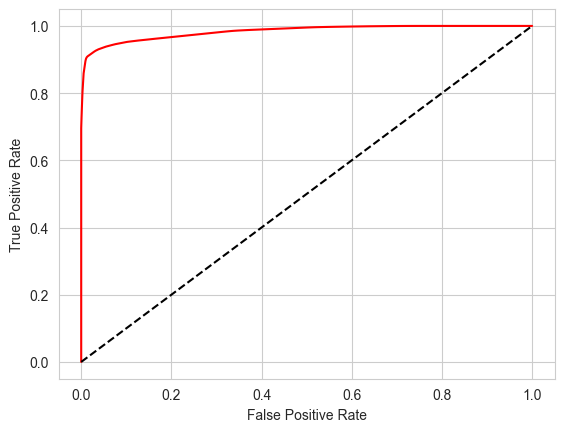

In [20]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [22]:
y_pred_test = dt_model.predict(X_test)

In [24]:
accuracy_score(y_test,y_pred_test)  # test accuracy of gini

0.909406902331251

### finding optimal tree depth and training model .

In [12]:
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(estimator = dt_model,param_grid = {'criterion':['entropy','gini'],
                                                                'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                              cv=5)
grid_search_cv.fit(X,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 9}
0.9357111924781878


In [13]:
dt_model1 = DecisionTreeClassifier(max_depth = 9,criterion='entropy')   # Training DT with max depth 9 which came out optimal
dt_model1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [15]:
y_pred_train1 = dt_model1.predict(X_train)

In [17]:
print('Accuracy: ',accuracy_score(y_train,y_pred_train1))     # Checking Accuracy
print('Cf Matrix:\n',confusion_matrix(y_train,y_pred_train1))
print('Classification:',classification_report(y_train,y_pred_train1))

Accuracy:  0.9438824462120473
Cf Matrix:
 [[ 60816   6857]
 [ 16714 335642]]
Classification:               precision    recall  f1-score   support

         0.0       0.78      0.90      0.84     67673
         1.0       0.98      0.95      0.97    352356

    accuracy                           0.94    420029
   macro avg       0.88      0.93      0.90    420029
weighted avg       0.95      0.94      0.95    420029



In [19]:
from sklearn.metrics import roc_curve,roc_auc_score    # Finding AUC for Entropy loss method , For training
fpr, tpr, thresholds = roc_curve(y, dt_model1.predict_proba (X)[:,1])
auc = roc_auc_score(y_train,y_pred_train1)
print('Area Under the Curve[AUC]: ',auc)

Area Under the Curve[AUC]:  0.9256197638830996


Text(0, 0.5, 'True Positive Rate')

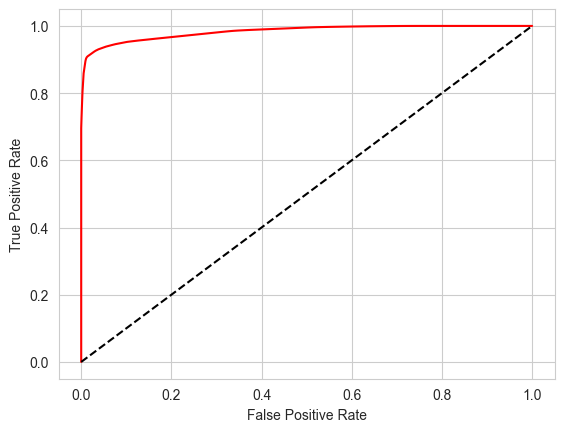

In [21]:
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [23]:
y_pred_test1 = dt_model1.predict(X_test)     # Test Accuracy for Entropy method

In [25]:
accuracy_score(y_test,y_pred_test1)

0.9429091116867286

### Applying k fold cross validation for checking model accuracy

In [26]:
train_data=result[:420029]
train_data

,payFrequency,apr,originated,nPaidOff,approved,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,Application_Year,Application_Month,installmentIndex,isCollection,principal,fees,paymentAmount,paymentStatus,isFunded
0,0,199.0,1,0.0,1,1,3000.0,6395.19,4,3,0.0,2016,1,1.0,0,151.98,114.49,266.47,1,1.0
1,0,199.0,1,0.0,1,1,3000.0,6395.19,4,3,0.0,2016,1,2.0,0,49.08,217.39,266.47,1,1.0
2,0,199.0,1,0.0,1,1,3000.0,6395.19,4,3,0.0,2016,1,3.0,0,52.83,213.64,266.47,1,1.0
3,0,199.0,1,0.0,1,1,3000.0,6395.19,4,3,0.0,2016,1,4.0,0,56.86,209.61,266.47,1,1.0
4,0,199.0,1,0.0,1,1,3000.0,6395.19,4,3,0.0,2016,1,5.0,0,61.20,205.27,266.47,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420024,1,590.0,1,0.0,1,0,400.0,1205.78,7,0,6.0,2015,11,5.0,0,6.33,43.00,49.33,1,1.0
420025,1,590.0,1,0.0,1,0,400.0,1205.78,7,0,6.0,2015,11,6.0,0,1.00,48.33,49.33,1,1.0
420026,1,590.0,1,0.0,1,0,400.0,1205.78,7,0,6.0,2015,11,7.0,0,7.17,42.17,49.34,1,1.0
420027,1,590.0,1,0.0,1,0,400.0,1205.78,7,0,6.0,2015,11,8.0,0,7.98,41.36,49.34,1,1.0


In [27]:
test_data=result[420029:]
test_data

,payFrequency,apr,originated,nPaidOff,approved,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,Application_Year,Application_Month,installmentIndex,isCollection,principal,fees,paymentAmount,paymentStatus,isFunded
420029,1,590.0,1,0.0,1,0,400.0,1205.78,7,0,6.0,2015,11,10.0,0,9.89,39.45,49.34,1,1.0
420030,1,590.0,1,0.0,1,0,400.0,1205.78,7,0,6.0,2015,11,11.0,0,11.00,38.33,49.33,1,1.0
420031,1,590.0,1,0.0,1,0,400.0,1205.78,7,0,6.0,2015,11,12.0,0,12.24,37.09,49.33,1,1.0
420032,1,590.0,1,0.0,1,0,400.0,1205.78,7,0,6.0,2015,11,13.0,0,13.64,35.70,49.34,1,1.0
420033,1,590.0,1,0.0,1,0,400.0,1205.78,7,0,6.0,2015,11,14.0,0,15.17,34.16,49.33,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525032,1,645.0,1,0.0,1,1,300.0,1034.38,17,1,6.0,2016,12,23.0,0,21.85,17.38,39.23,0,1.0
525033,1,645.0,1,0.0,1,1,300.0,1034.38,17,1,6.0,2016,12,24.0,0,24.56,14.67,39.23,0,1.0
525034,1,645.0,1,0.0,1,1,300.0,1034.38,17,1,6.0,2016,12,25.0,0,27.59,11.64,39.23,0,1.0
525035,1,645.0,1,0.0,1,1,300.0,1034.38,17,1,6.0,2016,12,26.0,0,31.01,8.22,39.23,0,1.0


In [28]:
X = train_data.drop('isFunded',axis=1)
y = train_data[['isFunded']]

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [30]:
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
results = cross_val_score(dt_model1, X_train, y_train, cv=kfold)

In [31]:
results

array([0.9439931 , 0.94330863, 0.9438443 , 0.94455687, 0.94434855,
       0.94283078, 0.94232486, 0.94271174, 0.94539016, 0.94628296])